In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example

In [2]:
def rk4(f, t0, y0, dh):
    """
    Implementation of the fourth-order Runge-Kutta method
    to solve an ordinary differential equation.

    Args:
    - f: Function representing the ODE dy/dt = f(t, y)
    - t0: Initial time
    - y0: Initial condition
    - h: Step size
    - num_steps: Number of steps to take

    Returns:
    - t: Array of time values
    - y: Array of solution values at corresponding time points
    """
    

    t = t0
    y = y0


    k1 = dh * f(t0, y0)
    k2 = dh * f(t0 + dh/2, y0 + k1/2)
    k3 = dh * f(t0 + dh/2, y0 + k2/2)
    k4 = dh * f(t0 + dh, y0 + k3)
    y +=  (k1 + 2*k2 + 2*k3 + k4) / 6
    t += dh

    return t, y

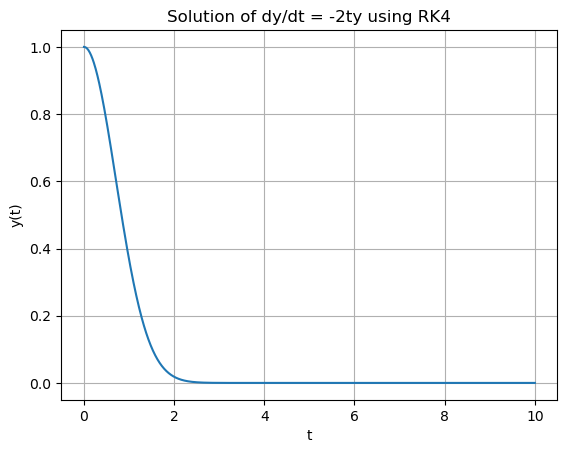

In [3]:
# Example usage: Solve the ODE dy/dt = -2ty
def f(t, y):
    return -2 * t * y

t0 = 0  # initial time
y0 = 1  # initial condition
dh = 0.01  # step size
num_steps = 1000  # number of steps

t = [t0]
y = [y0]

for i in range(0,num_steps):
    t0, y0 = rk4(f, t0, y0, dh)
    t.append(t0)
    y.append(y0)

# Plot the solution
plt.grid()
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solution of dy/dt = -2ty using RK4')
plt.show()



# Runge-Kutta Method (RK4)

We use Runge-Kutta method to solve first and second order ODEs. Specifically, in our case, we want to find the trajectory of two dark matter halos falling into each other. The equation of motion is given by:

$$
\frac{d^2 \mathbf{\vec{r}_1}}{dt^2} = -G\frac{M_2}{(r_1-r_2)^3}(\vec{r}_1-\vec{r}_2)\\
\frac{d^2 \mathbf{\vec{r}_2}}{dt^2} = G\frac{M_1}{(r_1-r_2)^3}(\vec{r}_1-\vec{r}_2)
$$

Decompose $\vec{r}$ under cartesian coordinate, we obtain six second-order ODE with respect to $x,y,z$:
$$
\frac{d^2 \mathbf{x_1}}{dt^2} = -G\frac{M_2}{(r_1-r_2)^3}(x_1 - x_2)\\
\frac{d^2 \mathbf{y_1}}{dt^2} = -G\frac{M_2}{(r_1-r_2)^3}(y_1 - y_2)\\
\frac{d^2 \mathbf{z_1}}{dt^2} = -G\frac{M_2}{(r_1-r_2)^3}(z_1 - z_2)\\
\frac{d^2 \mathbf{x_2}}{dt^2} = G\frac{M_1}{(r_1-r_2)^3}(x_1 - x_2)\\
\frac{d^2 \mathbf{y_2}}{dt^2} = G\frac{M_1}{(r_1-r_2)^3}(y_1 - y_2)\\
\frac{d^2 \mathbf{z_2}}{dt^2} = G\frac{M_1}{(r_1-r_2)^3}(z_1 - z_2)
$$

We can then use Runge-Kutta method to solve these ODEs. Remember, $||r_i|| = \sqrt{x_i^2+y_i^2+z_i^2}$.

In [4]:
def rk4_second_order(f, T0, R0, V0, M, dh):
    """
    Implementation of the fourth-order Runge-Kutta method
    to solve a second-order ordinary differential equation.

    Args:
    - f: Function representing the second-order ODE d^2y/dt^2 = f(t, y, z)
    - t0: Initial time
    - y0: Initial condition for y
    - z0: Initial condition for dy/dt
    - h: Step size
    - num_steps: Number of steps to take

    Returns:
    - t: Array of time values
    - y: Array of solution values for y at corresponding time points
    """

    t = T0

    # Initial Conditions of Dark Matter Halos

    r = R0.copy()
    v = V0.copy()

    # k1 coefficients
    k1_r = dh * v
    k1_v = dh * f(t, r, M)

    # k2 coefficients
    k2_r = dh * (v + k1_v/2)
    k2_v = dh * f(t + dh/2, r + k1_r/2, M)


    k3_r = dh * (v + k2_v/2)
    k3_v= dh * f(t + dh/2, r + k2_r/2, M)


    k4_r = dh * (v + k3_v)
    k4_v = dh * f(t + dh, r + k3_r,  M)


    r += dh * (k1_r + 2*k2_r + 2*k3_r + k4_r) / 6
    v += dh * (k1_v + 2*k2_v + 2*k3_v + k4_v) / 6
    
    t += dh

    # print(t, r)

    return [t, r, v]


In [5]:
# Setting up initial conditions
              # x     y      z
v0 = np.array([1.,    1,     1., 
               -1.,  -1.2,     -1.])

r0 = np.array([-1.,   -0.4,     -1., 
                1.,    0.4,      1.])

G = 0.65
M = [3, 5]

def f(T, R0, M):

    r1 = np.array(R0[:3])
    r2 = np.array(R0[3:])

    dr_vec = r1-r2
    dr = np.sum((r1-r2)**2)

    fx1 = -G * M[1] / (dr ** 3) * dr_vec[0]
    fy1 = -G * M[1] / (dr ** 3) * dr_vec[1]
    fz1 = -G * M[1] / (dr ** 3) * dr_vec[2]

    fx2 = G * M[0] / (dr ** 3) * dr_vec[0]
    fy2 = G * M[0] / (dr ** 3) * dr_vec[1]
    fz2 = G * M[0] / (dr ** 3) * dr_vec[2]

    F = np.array([fx1, fy1, fz1, fx2, fy2, fz2])

    return F

t0 = 0
dh = 0.005
num_steps = 100000  # number of steps

T = [t0]
R = [r0]
V = [v0]

t0 = 0

for i in range(0, num_steps):
    t0, r0, v0 = rk4_second_order(f, t0, r0, v0, M, dh)
    
    T.append(t0)
    R.append(r0)
    V.append(v0)


In [6]:
x1 = [RR[0] for RR in R]
x2 = [RR[3] for RR in R]

y1 = [RR[1] for RR in R]
y2 = [RR[4] for RR in R]

z1 = [RR[2] for RR in R]
z2 = [RR[5] for RR in R]

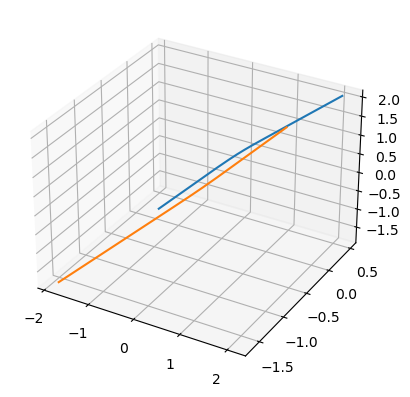

In [7]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(x1,y1,z1)
ax.plot(x2,y2,z2)